In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import seaborn as sns
import imblearn 
import random

from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [2]:
df = pd.read_csv('sample-features-ip2.csv')

In [3]:
cols = ['IP Address', 'Is Attack IP', 'Login Successful',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'bot', 'desktop',
       'mobile', 'tablet']
df_features = df[cols]
df_features['Is Attack IP'] = df_features['Is Attack IP'].astype(int)
df_features = df_features.fillna(0)

/var/folders/dc/xfskm7hx35db80zpm6534xzr0000gn/T/ipykernel_56340/2790961587.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['Is Attack IP'] = df_features['Is Attack IP'].astype(int)


In [4]:
df_features[df_features.isna().any(axis=1)]

,IP Address,Is Attack IP,Login Successful,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,bot,desktop,mobile,tablet


In [6]:
df_features['Is Attack IP'].value_counts()

0    595766
1     17390
Name: Is Attack IP, dtype: int64

In [7]:
X = df_features.iloc[:, 2:].to_numpy()
y = df_features['Is Attack IP']

# from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
smote = imblearn.over_sampling.SMOTE(sampling_strategy=0.3)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', y.value_counts())
print('Resample dataset shape', y_smote.value_counts())

Original dataset shape 0    595766
1     17390
Name: Is Attack IP, dtype: int64
Resample dataset shape 0    595766
1    178729
Name: Is Attack IP, dtype: int64


In [10]:
from sklearn.model_selection import StratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression

kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=202020)

X = df_features.iloc[:, 2:]
y = df_features['Is Attack IP']

for fold, (tr_ind, val_ind) in enumerate(kfold.split(x_smote, y_smote)):
    X_train, X_val = x_smote[tr_ind], x_smote[val_ind]
    y_train, y_val = y_smote[tr_ind], y_smote[val_ind]
    cls = LogisticRegression()
    cls.fit(X_train, y_train)
    val_pred1 = cls.predict(X_val)
    print('Accuracy score -', fold+1, ': ', accuracy_score(y_val, val_pred1))
    break


Accuracy score - 1 :  0.778702536875594


/Users/nickbuchert/miniforge3/envs/en685648/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
preds = cls.predict_proba(X)
preds = [1 if pred[1] > 0.30 else 0 for pred in preds]
confusion_matrix(y, preds)

/Users/nickbuchert/miniforge3/envs/en685648/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[591340,   4426],
       [ 15915,   1475]])

In [ ]:
df_features['total_logins'] = np.sum(df_features.iloc[:, 4:27], axis=1)

<AxesSubplot:>

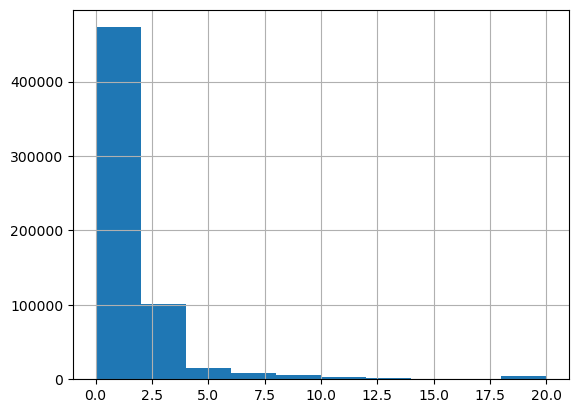

In [ ]:
df_features['total_logins'].clip(0,20).hist()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_smote, y_smote)


LogisticRegression()

In [ ]:
preds = lr.predict(x_smote)
accuracy_score(y_smote, preds)

0.6401937606649742

In [14]:
preds = lr.predict(X)
accuracy_score(y, preds)

NameError: name 'lr' is not defined